In [30]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv("/content/adra.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,19.765,19.841,19.680,19.809,39465,0
1,2005-02-28,22.423,22.423,19.875,19.918,24795,0
2,2005-03-01,19.911,19.942,19.903,19.935,16601,0
3,2005-03-02,20.535,20.535,19.818,19.875,14231,0
4,2005-03-03,19.918,19.942,19.875,19.884,14847,0


In [31]:
# Menampilkan 5 baris pertama DataFrame
print(" 5 Baris Pertama DataFrame ")
print(df.head())

# Menampilkan jumlah baris dan kolom DataFrame
print("\n Jumlah Baris dan Kolom")
print(df.shape)

# Menampilkan nama-nama kolom dalam DataFrame
print("\n Nama-Nama Kolom dalam DataFrame")
print(df.columns)


 5 Baris Pertama DataFrame 
         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  19.765  19.841  19.680  19.809   39465        0
1  2005-02-28  22.423  22.423  19.875  19.918   24795        0
2  2005-03-01  19.911  19.942  19.903  19.935   16601        0
3  2005-03-02  20.535  20.535  19.818  19.875   14231        0
4  2005-03-03  19.918  19.942  19.875  19.884   14847        0

 Jumlah Baris dan Kolom
(2986, 7)

 Nama-Nama Kolom dalam DataFrame
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

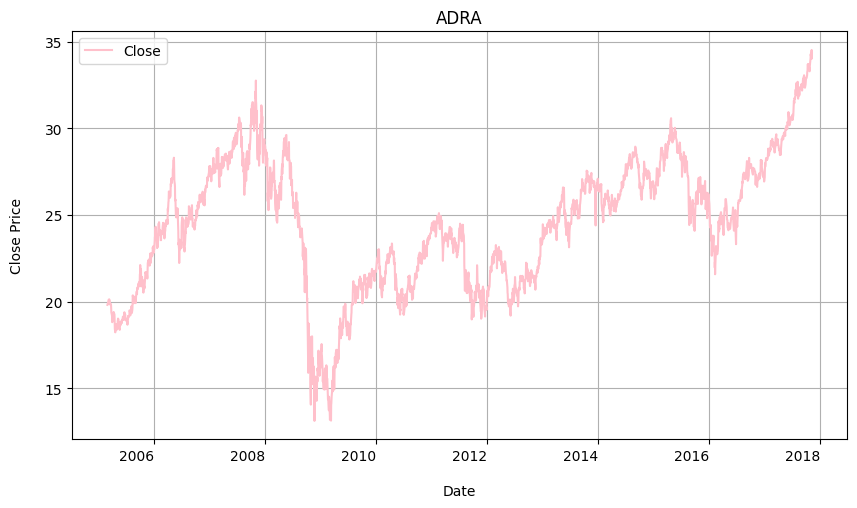

In [20]:
# Grafik fluktuasi harga penutupan saham dari waktu ke waktu.

df[['Close']].plot(figsize=(10, 6), legend=True, color='pink')
plt.title("ADRA")
plt.xlabel("Date", labelpad=15)
plt.ylabel("Close Price", labelpad=15)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

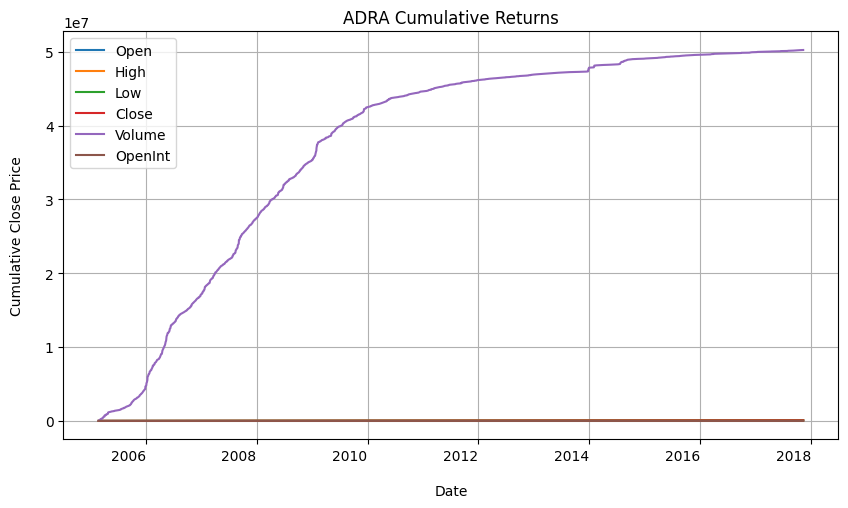

In [21]:
# Grafik perkembangan kumulatif harga penutupan dari waktu ke waktu

dr = df.cumsum()
dr.plot(figsize=(10, 6))
plt.title('ADRA Cumulative Returns')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Cumulative Close Price', labelpad=15)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

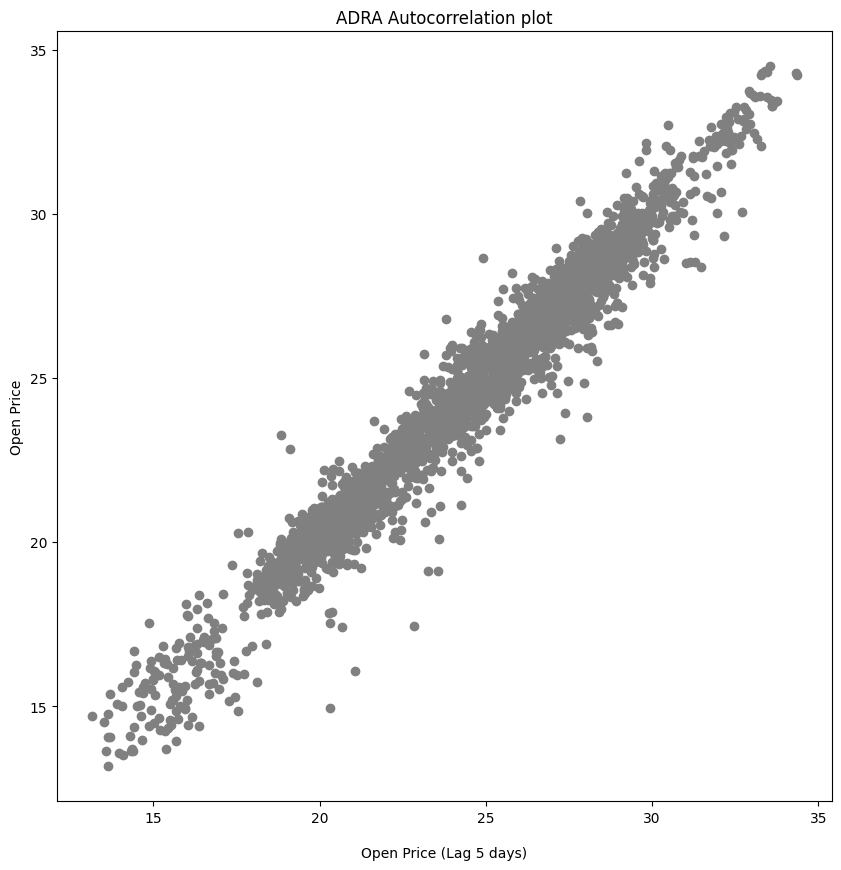

In [22]:
# Grafik pola keterkaitan antara harga pembukaan dengan harga pembukaan 5 hari sebelumnya.

plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5, c='gray')

plt.title('ADRA Autocorrelation plot')
plt.xlabel('Open Price (Lag 5 days)', labelpad=15)
plt.ylabel('Open Price')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [32]:
# Access the date using the index instead of as a column
df['Date'][2985]

'2017-11-10'

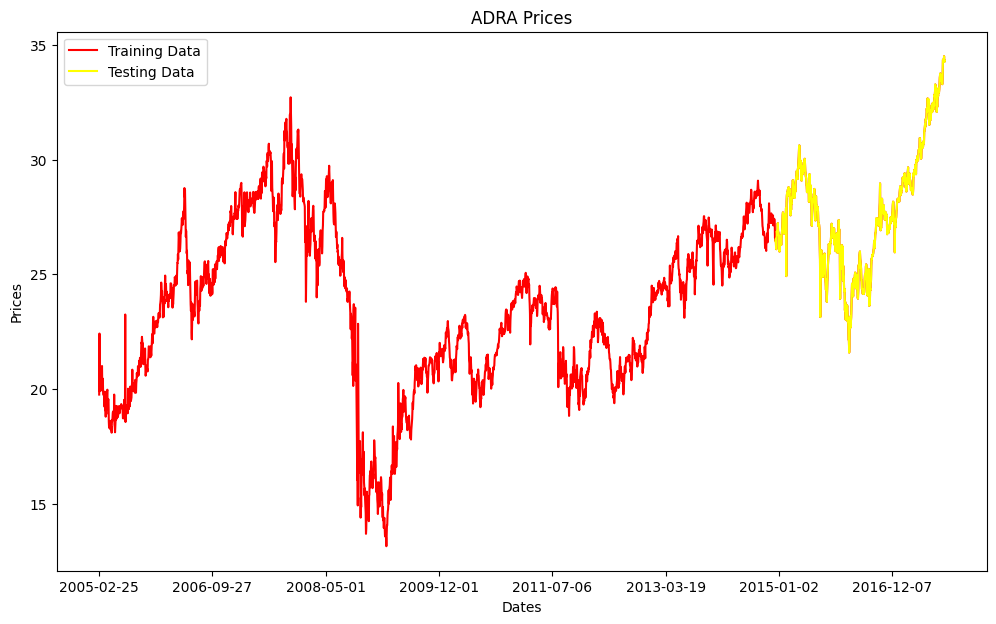

In [34]:
# Grafik ini membandingkan harga pembukaan (Open) antara data pelatihan (80%) dan pengujian (20%)
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ADRA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'red', label='Training Data')
plt.plot(test_data['Open'], 'yellow', label='Testing Data')
plt.xticks(np.arange(0,2985, 400), df['Date'][0:2985:400])
plt.legend()

In [35]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
# Mengukur persentase kesalahan relatif antara prediksi dan nilai sebenarnya

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [36]:
# Menghitung error model dengan menggunakan dua metrik evaluasi:
# 1. Mean Squared Error (MSE) mengukur rata-rata kesalahan kuadrat antara prediksi dan nilai aktual
# 2. Symmetric Mean Absolute Percentage Error (SMAPE) mengukur kesalahan dalam bentuk persentase simetris antara prediksi dan nilai aktual.

train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.161
Symmetric mean absolute percentage error: 1.011


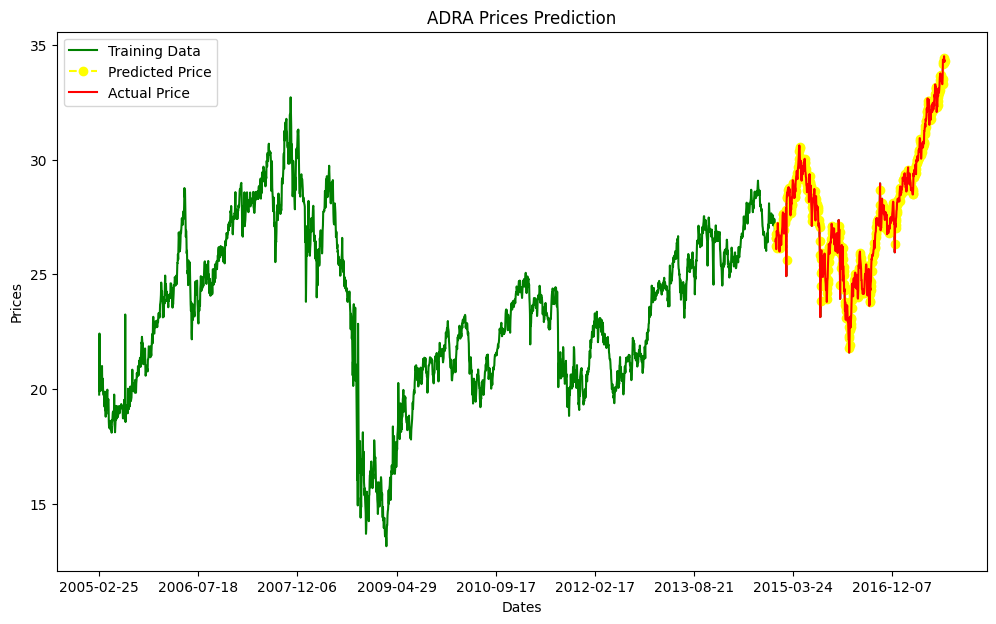

In [38]:
## Grafik untuk membedakan antara data pelatihan, prediksi, dan harga aktual

plt.figure(figsize=(12,7))
plt.plot(df['Open'], color='green', label='Training Data')
plt.plot(test_data.index, predictions, color='yellow', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('ADRA Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2985, 350), df['Date'][0:2985:350])
plt.legend()
plt.show()

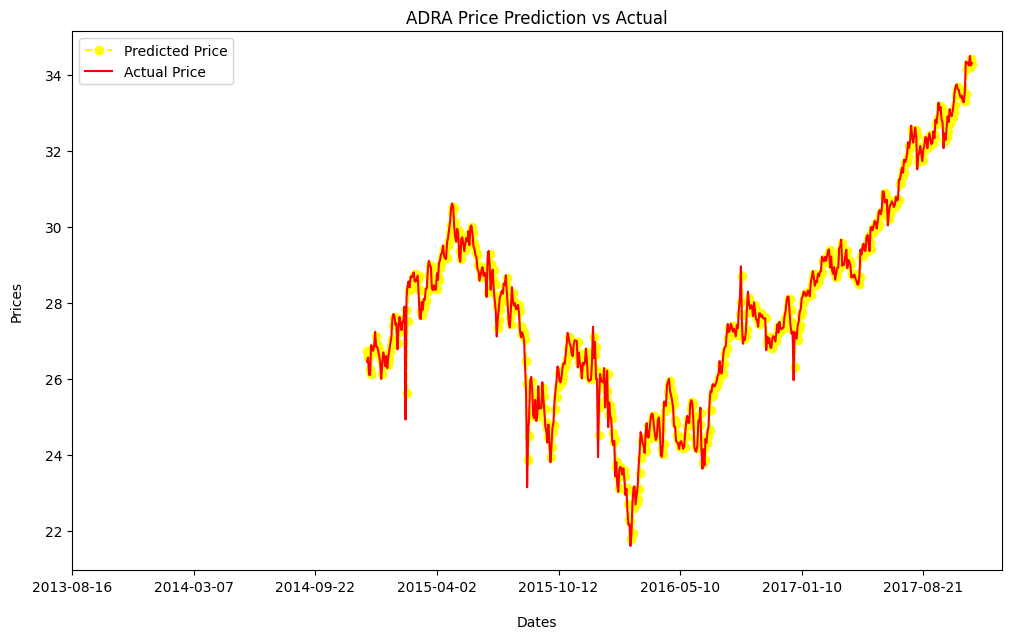

In [40]:
# Grafik untuk membedakan antara harga yang diprediksi dan harga aktual

plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='yellow', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(2097,2985, 120), df['Date'][2097:2985:120])
plt.title('ADRA Price Prediction vs Actual')
plt.xlabel('Dates', labelpad=15)
plt.ylabel('Prices', labelpad=15)
plt.legend()
plt.show()

<ipython-input-41-e577161555d4>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df['Close'].resample('Y').last().reset_index()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not hav

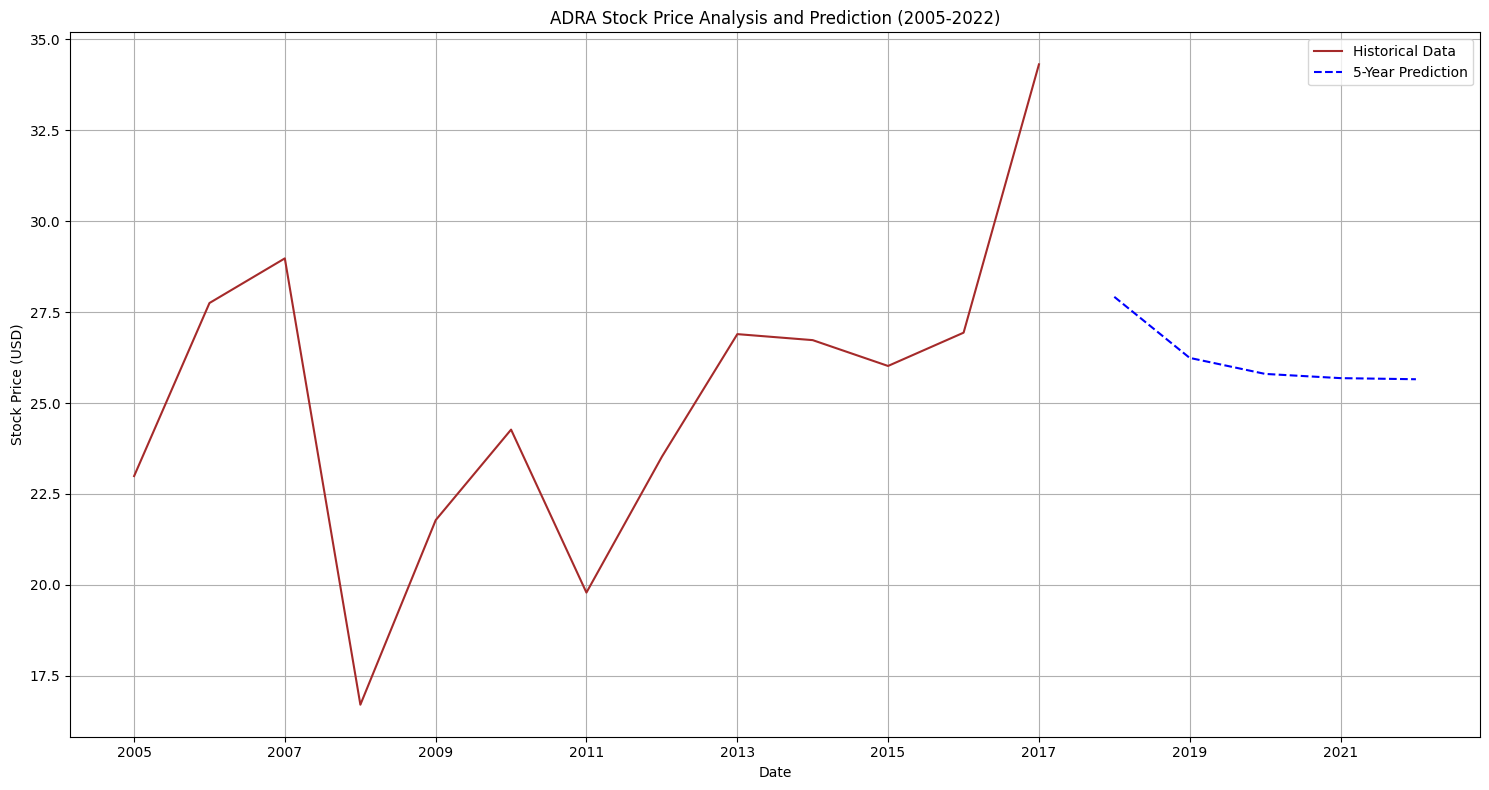


Predictions for next 5 years:
2018: $27.92
2019: $26.24
2020: $25.80
2021: $25.68
2022: $25.65


In [41]:
# Grafik untuk memprediksi saham selama 5 tahun ke depan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('adra.us.txt')
df['Date'] = pd.to_datetime(df['Date'])

# Resample to yearly data
df.set_index('Date', inplace=True)
df_yearly = df['Close'].resample('Y').last().reset_index()

# Ensure data starts from 2005
start_year = 2005
df_yearly = df_yearly[df_yearly['Date'].dt.year >= start_year]

# Prepare features
X = df_yearly[:-1]
y = df_yearly['Close'][1:]

# Train model
model = LinearRegression()
model.fit(X[['Close']], y)

# Calculate R² score
predictions_hist = model.predict(X[['Close']])
r2 = r2_score(y, predictions_hist)

# Future predictions
last_price = df_yearly['Close'].iloc[-1]
future_prices = []
for _ in range(5):
    next_pred = model.predict([[last_price]])[0]
    future_prices.append(next_pred)
    last_price = next_pred

# Create future dates DataFrame
last_date = df_yearly['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=6, freq='Y')[1:]
future_df = pd.DataFrame({
    'Date': future_dates,
    'Close': future_prices
})

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df_yearly['Date'], df_yearly['Close'], color='brown', label='Historical Data')
plt.plot(future_df['Date'], future_df['Close'], color='blue', linestyle='--',
         label=f'5-Year Prediction')

plt.title('ADRA Stock Price Analysis and Prediction (2005-2022)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.legend()

# Format x-axis to show years with 2-year interval
years = pd.date_range(start=df_yearly['Date'].min(), end=future_df['Date'].max(), freq='2Y')
plt.xticks(years, [d.strftime('%Y') for d in years], rotation=0)

plt.tight_layout()
plt.show()

print("\nPredictions for next 5 years:")
for date, price in zip(future_df['Date'], future_df['Close']):
    print(f"{date.strftime('%Y')}: ${price:.2f}")